### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [14]:
data = pd.read_csv('data/coupons.csv')

In [15]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [16]:
#Get the summary of a DataFrame to get details about rows count, column's non null count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [17]:
# Check for colums with missing data
missing_percent = (data.isnull().sum() / data.shape[0]) * 100
missing_percent[missing_percent > 0].sort_values(ascending=False)

car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
dtype: float64

Text(0, 0.5, 'Data Missing %')

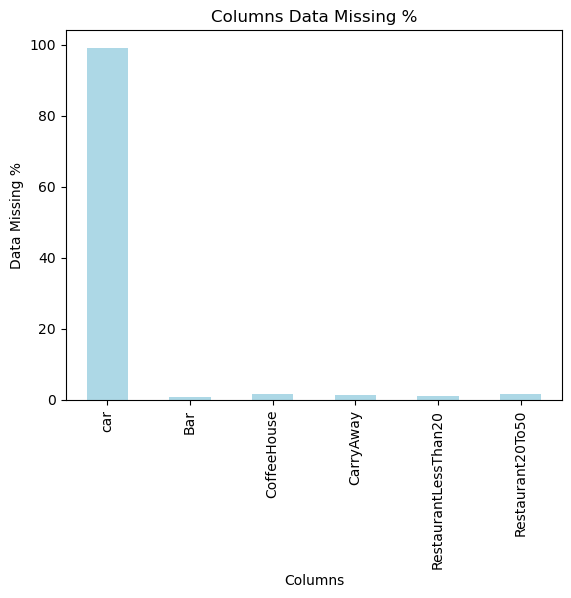

In [18]:
#Plot to visualize colums data missing %
missing_percent[missing_percent > 0].plot(kind="bar", color='lightblue')

plt.title("Columns Data Missing %")
plt.xlabel("Columns")
plt.ylabel("Data Missing %")

3. Decide what to do about your missing data -- drop, replace, other...

Observations:
* There are 6 columns with missing data. Out of which only one column "car" has
more than 99% of missing values so we can drop it to avoid risk of changing the distribution of data
* Other attributes have around 1% missing values only so we’ll fill them with mode value



In [19]:
# Drop car column
data = data.drop('car', axis=1)

# Fill missing values with mode value
data['Bar'] = data['Bar'].fillna(data['Bar'].mode()[0])
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].mode()[0])
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0])


4. What proportion of the total observations chose to accept the coupon?

In [21]:
# Proportion calculation of coupons acceptance
coupon_acceptance = data['Y'].value_counts(normalize=True) * 100
print(coupon_acceptance)


Y
1    56.843267
0    43.156733
Name: proportion, dtype: float64


**Observation:**
56.8% of the customers accepted the coupons

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Coupon count')

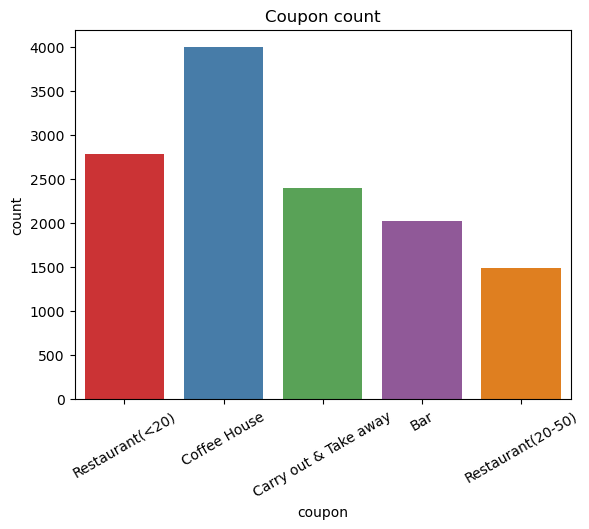

In [22]:
fig = sns.countplot(x = "coupon", data = data, palette ='Set1', hue = "coupon")
plt.xticks(rotation=30) 
plt.title("Coupon count")

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Temperature Histogram')

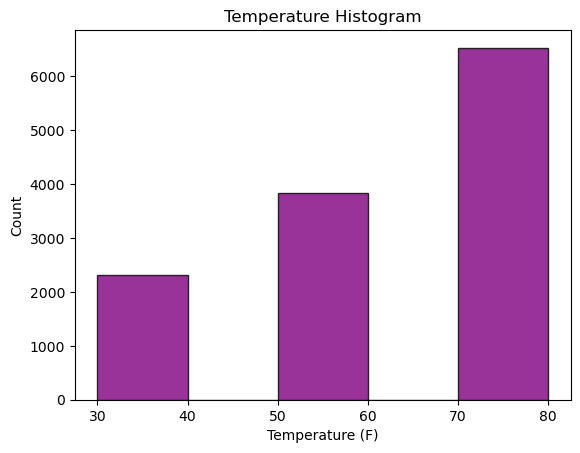

In [23]:
plt.hist(data["temperature"], 5, histtype ='bar',color = 'purple',edgecolor = 'black', alpha = 0.8)
plt.xlabel('Temperature (F)')
plt.ylabel('Count')
plt.title('Temperature Histogram')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [24]:
#Dataframe with bar coupons
bar_coupons = data.query("coupon == 'Bar'")
bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [25]:
bar_coupon_acceptance = bar_coupons['Y'].value_counts()
print(bar_coupon_acceptance)

# Bar Coupons Proportion calculation
bar_coupon_accepted = sum(bar_coupons["Y"])/bar_coupons.shape[0] * 100
print("Bar coupons acceptance % is ",bar_coupon_accepted)

Y
0    1190
1     827
Name: count, dtype: int64
Bar coupons acceptance % is  41.00148735746158


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [26]:
# Bar coupons dataframe with Bar and Y columns
bar_visits = bar_coupons[["Bar","Y"]]

#Get all applicable unique values for colums to apply filters 
print("All Bar column values:", bar_visits['Bar'].unique())


All Bar column values: ['never' 'less1' '1~3' 'gt8' '4~8']


In [27]:
# Replace values of Bar column
bar_visits.loc[(bar_visits.Bar.isin(["never", "less1", "1~3"])), "Bar"] = "<= 3 Times"
bar_visits.loc[(bar_visits.Bar.isin(["4~8", "gt8"])), "Bar"] = "> 3 Times"

#Calculate count of values for each Bar column kind and also calculate sum of coupon accepted for that category
bar_visits = bar_visits.groupby("Bar").agg({"Bar": 'size', 'Y':'sum'})
bar_visits.rename(columns={"Bar":"total_count","Y":"acceptance_count"},inplace=True)
bar_visits["acceptance_percentage"] = bar_visits["acceptance_count"]/bar_visits["total_count"]*100

bar_visits = bar_visits.reset_index()
bar_visits

,Bar,total_count,acceptance_count,acceptance_percentage
0,<= 3 Times,1818,674,37.073707
1,> 3 Times,199,153,76.884422


Text(0, 0.5, 'Acceptance %')

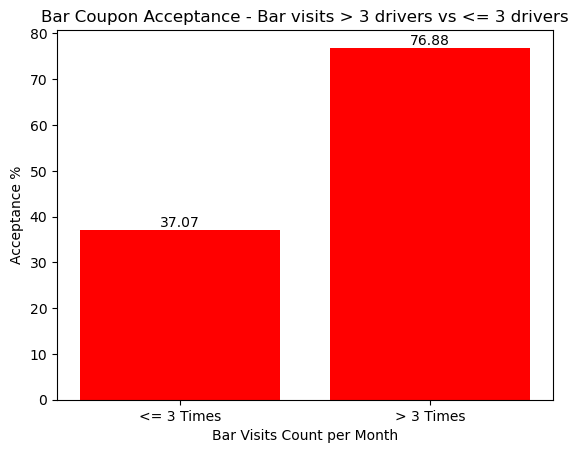

In [396]:
#Bar graph to visualize acceptance rate of bar coupons by drivers who went to a bar 3 or fewer times a month to those who went more
bar_visits_plt = plt.bar(bar_visits["Bar"],bar_visits["acceptance_percentage"], color = "red")

plt.bar_label(bar_visits_plt,np.round(bar_visits["acceptance_percentage"], decimals=2))
plt.title("Bar Coupon Acceptance - Bar visits > 3 drivers vs <= 3 drivers")
plt.xlabel("Bar Visits Count per Month")
plt.ylabel("Acceptance %")

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?

In [28]:
# Bar coupons dataframe with Bar,age and Y columns
bar_visits_agebased = bar_coupons[["age","Bar","Y"]].copy()

#Get all applicable unique values for colums to apply filters 
print("All Bar column values:", bar_visits_agebased['Bar'].unique())
print("All age column values:", bar_visits_agebased['age'].unique())

All Bar column values: ['never' 'less1' '1~3' 'gt8' '4~8']
All age column values: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']


In [29]:
# Add new column in dataframe with values 'Yes' or 'No' based on conditions 
bar_visits_agebased['25_older_visit_bar_once_or_more'] = np.where( 
    (~bar_visits_agebased.age.isin(["below21","21"])) & 
    (bar_visits_agebased.Bar.isin(["1~3","4~8","gt8"]))
    , "Yes", "No")

#Calculate count of values for each 25_older_visit_bar_once_or_more column kind and also calculate sum of coupon accepted for that category
bar_visits_agebased = bar_visits_agebased.groupby("25_older_visit_bar_once_or_more").agg({"25_older_visit_bar_once_or_more": 'size', 'Y':'sum'})
bar_visits_agebased.rename(columns={"25_older_visit_bar_once_or_more":"total_count","Y":"acceptance_count"},inplace=True)
bar_visits_agebased["acceptance_percentage"] = bar_visits_agebased["acceptance_count"]/bar_visits_agebased["total_count"]*100

bar_visits_agebased = bar_visits_agebased.reset_index()
bar_visits_agebased

,25_older_visit_bar_once_or_more,total_count,acceptance_count,acceptance_percentage
0,No,1597,535,33.500313
1,Yes,420,292,69.523810


Text(0, 0.5, 'Acceptance %')

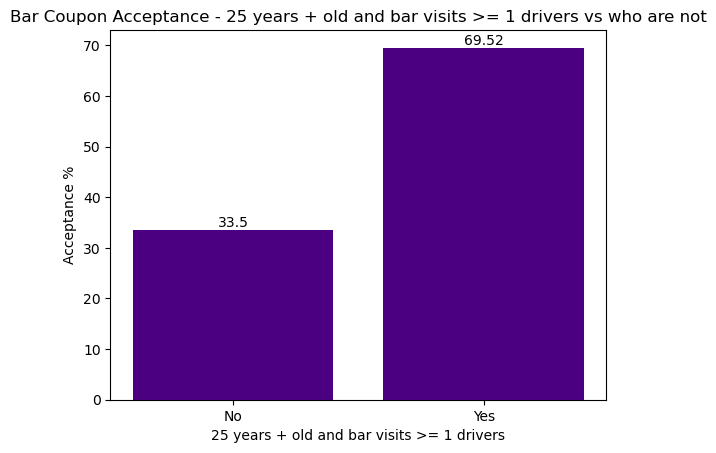

In [30]:
#Plot a graph to represent the acceptance
bar_visits_agebased_plt = plt.bar(bar_visits_agebased["25_older_visit_bar_once_or_more"],bar_visits_agebased["acceptance_percentage"], color='indigo')

plt.bar_label(bar_visits_agebased_plt,np.round(bar_visits_agebased["acceptance_percentage"],decimals=2))
plt.title("Bar Coupon Acceptance - 25 years + old and bar visits >= 1 drivers vs who are not")
plt.xlabel("25 years + old and bar visits >= 1 drivers")
plt.ylabel("Acceptance %")

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [31]:
bar_psngr_ocptn = bar_coupons[["passanger","Bar","occupation","Y"]].copy()

#Get all applicable unique values for colums to apply filters 
print("All Bar column values:", bar_psngr_ocptn['Bar'].unique())
print("All Passanger column values:", bar_psngr_ocptn['passanger'].unique())
print("All occupation column values:", bar_psngr_ocptn['occupation'].unique())


All Bar column values: ['never' 'less1' '1~3' 'gt8' '4~8']
All Passanger column values: ['Kid(s)' 'Alone' 'Friend(s)' 'Partner']
All occupation column values: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']


In [32]:
# Add new column in dataframe with values 'Yes' or 'No' based on conditions 
bar_psngr_ocptn['driver'] = np.where(
    (bar_psngr_ocptn['passanger'] != 'Kid(s)') &
    (bar_psngr_ocptn.Bar.isin(["1~3","4~8","gt8"])) &
    (bar_psngr_ocptn['occupation'] != 'Farming Fishing & Forestry')
    , "Yes", "No")


bar_psngr_ocptn = bar_psngr_ocptn.groupby("driver").agg({"driver": 'size', 'Y':'sum'})
bar_psngr_ocptn.rename(columns={"driver":"total_count","Y":"acceptance_count"},inplace=True)
bar_psngr_ocptn["acceptance_percentage"] = bar_psngr_ocptn["acceptance_count"]/bar_psngr_ocptn["total_count"]*100

bar_psngr_ocptn = bar_psngr_ocptn.reset_index()
bar_psngr_ocptn

,driver,total_count,acceptance_count,acceptance_percentage
0,No,1466,434,29.604366
1,Yes,551,393,71.324864


(0.0, 81.32486388384754)

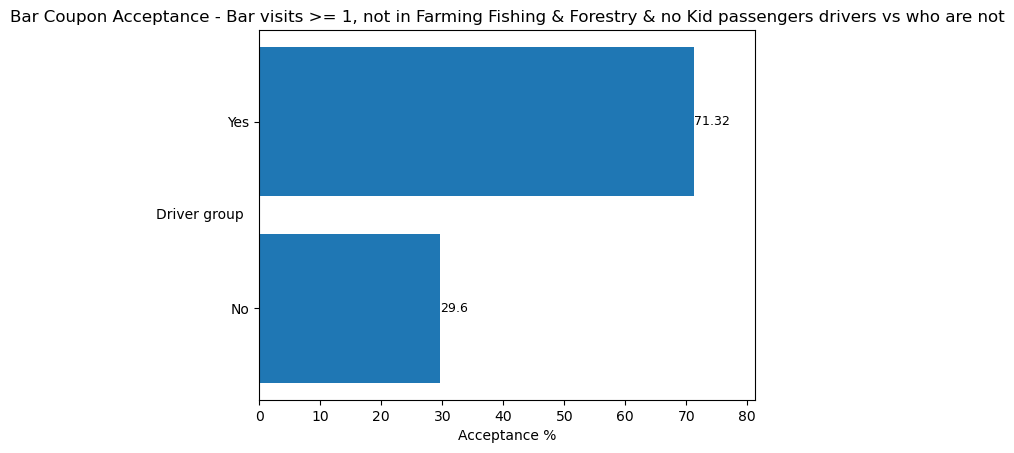

In [33]:
#Plot a graph to represent the acceptance
bar_psngr_ocptn_plt = plt.barh(bar_psngr_ocptn["driver"],bar_psngr_ocptn["acceptance_percentage"])

plt.bar_label(bar_psngr_ocptn_plt,np.round(bar_psngr_ocptn["acceptance_percentage"],decimals=2),fontsize=9)
plt.title("Bar Coupon Acceptance - Bar visits >= 1, not in Farming Fishing & Forestry & no Kid passengers drivers vs who are not")
plt.ylabel("Driver group", rotation=0,labelpad=20, va='center')
plt.xlabel("Acceptance %")
plt.xlim(0, bar_psngr_ocptn["acceptance_percentage"].max() + 10)


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [34]:
bar_visits_06 = bar_coupons[["maritalStatus","age","income","passanger","Bar","occupation","RestaurantLessThan20","Y"]].copy()

#Get all applicable unique values for colums to apply filters 
print("All Bar column values:", bar_visits_06['Bar'].unique())
print("All age column values:", bar_visits_06['age'].unique())
print("All maritalStatus column values:", bar_visits_06['maritalStatus'].unique())
print("All income column values:", bar_visits_06['income'].unique())
print("All passanger column values:", bar_visits_06['passanger'].unique())
print("All occupation column values:", bar_visits_06['occupation'].unique())
print("All RestaurantLessThan20 column values:", bar_visits_06['RestaurantLessThan20'].unique())


All Bar column values: ['never' 'less1' '1~3' 'gt8' '4~8']
All age column values: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
All maritalStatus column values: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
All income column values: ['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
All passanger column values: ['Kid(s)' 'Alone' 'Friend(s)' 'Partner']
All occupation column values: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & M

In [35]:
# Add new column in dataframe with values 'Yes' or 'No' based on conditions 

bar_visits_06['driver'] = np.where(
    (
        (bar_visits_06.Bar.isin(["1~3","4~8","gt8"])) &
        (bar_visits_06['passanger'] != 'Kid(s)') & 
        (bar_visits_06['maritalStatus'] != 'Widowed')
    ) |
    (
        (bar_visits_06.Bar.isin(["1~3","4~8","gt8"])) &
        (bar_visits_06.age.isin(["below21","21","26"]))
    ) | 
    (
        (bar_visits_06.income.isin(["$37500 - $49999", "$12500 - $24999", "$25000 - $37499", "Less than $12500"])) & 
        (bar_visits_06.RestaurantLessThan20.isin(["4~8","gt8"]))
    )
    , "Yes", "No")


bar_visits_06 = bar_visits_06.groupby("driver").agg({"driver": 'size', 'Y':'sum'})
bar_visits_06.rename(columns={"driver":"total_count","Y":"acceptance_count"},inplace=True)
bar_visits_06["acceptance_percentage"] = bar_visits_06["acceptance_count"]/bar_visits_06["total_count"]*100

bar_visits_06 = bar_visits_06.reset_index()
bar_visits_06

,driver,total_count,acceptance_count,acceptance_percentage
0,No,1241,370,29.814666
1,Yes,776,457,58.891753


Text(0.5, 1.0, 'Bar Coupon acceptance')

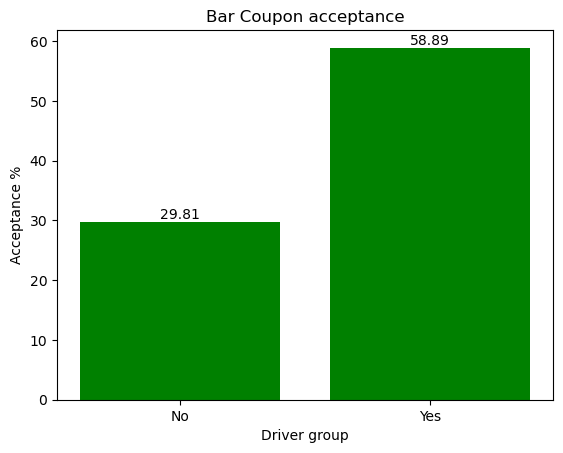

In [319]:
#Plot a graph to represent the acceptance
bar_visits_06_plt = plt.bar(bar_visits_06["driver"],bar_visits_06["acceptance_percentage"], color = 'green')
plt.bar_label(bar_visits_06_plt,np.round(bar_visits_06["acceptance_percentage"],decimals=2))
plt.xlabel("Driver group")
plt.ylabel("Acceptance %")
plt.title("Bar Coupon acceptance")

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the above **observations**, we can **hypothesize** that
- Only 41% of customers who were offered a bar coupon accepted it.
- Customers who go to bars more than 3 times a month are twice as likely to accept a bar coupon compared to those who go less frequently.
- Customers over the age of 25 who go to bars more than once a month are twice as likely to accept a bar coupon compared to other groups.
- Customers who go to bars more than once a month, travel with passengers other than kids, and have occupations outside of farming, fishing, or forestry accept more bar coupons than all others.
- Customer who go to bars more than once a month, travel with passengers other than kids and were not widowed OR who go to bars more than once a month and are under the age of 30 OR who go to cheap restaurants more than 4 times a month and income is less than 50K accept more bar coupons than all others.

**Next steps and recommendations**:

Given that acceptance rates among less-targeted groups are totally insignificant, continuing bar coupon distribution could help influence and convert occasional or non-bar-goers into potential customers.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  


8. What proportion of coffee house coupons were accepted?


In [36]:
#get dataframe with coffee house coupon
coffee_coupons = data.query("coupon == 'Coffee House'")
coffee_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


In [37]:
coffee_coupon_acceptance = coffee_coupons['Y'].value_counts()
print(coffee_coupon_acceptance)

# Bar Coupons Proportion calculation
coffee_coupon_accepted = sum(coffee_coupons["Y"])/coffee_coupons.shape[0] * 100
print("Coffee coupons acceptance % is ",coffee_coupon_accepted)

Y
0    2001
1    1995
Name: count, dtype: int64
Coffee coupons acceptance % is  49.92492492492492


9. Compare the acceptance rate of coffee coupon between those who went to a CoffeeHouse more than once and occupation is student/ unemployed with who are not


In [38]:
coffee_house_visits = coffee_coupons[["CoffeeHouse","occupation","Y"]].copy()

#Get all applicable unique values for colums to apply filters 
print("All CoffeeHouse column values:", coffee_house_visits['CoffeeHouse'].unique())
print("All occupation column values:", coffee_house_visits['occupation'].unique())


All CoffeeHouse column values: ['never' 'less1' '4~8' '1~3' 'gt8']
All occupation column values: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']


In [40]:
coffee_house_visits['customer'] = np.where( 
    (coffee_house_visits.occupation.isin(["Student","Unemployed"])) & 
    (coffee_house_visits.CoffeeHouse.isin(["1~3","4~8","gt8"])) 
    , "Yes", "No")

coffee_house_visits = coffee_house_visits.groupby("customer").agg({"customer": 'size', 'Y':'sum'})
coffee_house_visits.rename(columns={"customer":"total_count","Y":"acceptance_count"},inplace=True)
coffee_house_visits["acceptance_percentage"] = coffee_house_visits["acceptance_count"]/coffee_house_visits["total_count"]*100

coffee_house_visits = coffee_house_visits.reset_index()
coffee_house_visits

,customer,total_count,acceptance_count,acceptance_percentage
0,No,3423,1591,46.479696
1,Yes,573,404,70.506108


Text(0.5, 1.0, 'Coffee Coupon acceptance - Coffee House >= 1 and Student / Unemployed driver')

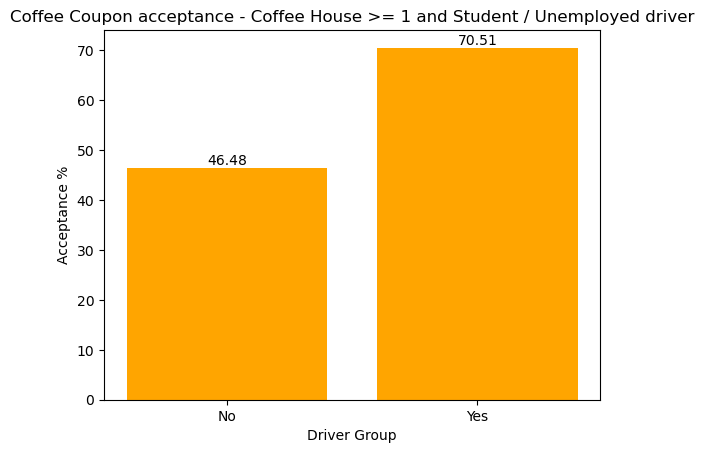

In [41]:
#Plot a graph to represent the acceptance
coffee_visits_08_plt = plt.bar(coffee_house_visits["customer"],coffee_house_visits["acceptance_percentage"], color = 'orange')
plt.bar_label(coffee_visits_08_plt,np.round(coffee_house_visits["acceptance_percentage"],decimals=2))
plt.xlabel("Driver Group")
plt.ylabel("Acceptance %")
plt.title("Coffee Coupon acceptance - Coffee House >= 1 and Student / Unemployed driver")

Based on the above **observations**, we can **hypothesize** that 
- Only 49.9% of customers accepted a coffee house coupon when offered.
- Customers who go to coffee house more than once a month and are either students or unemployed show 70% coupon acceptance rates than all others.


**Next steps and recommendations:**
Allocate a higher share of coffee house coupons to customers identified as students or unemployed who frequently visit coffee houses. Additionally, continue distributing coffee house coupons more broadly to influence and engage other customer groups with moderate acceptance rates.
